<a href="https://colab.research.google.com/github/drica-monteiro/intro_estat/blob/main/mcmc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm as tqdm

The Cauchy distribution has density $f(x)=\frac{1}{\pi}\frac{1}{1+x^2}$. Our goal is to simulate a Markov chain whose stationary distribution is $f$.

Our choice for the proposal distribution is $q(y\mid x)=\mathcal{N}(x,b^2)$. Then, the acceptance rate is $r(x,y) = \min\left\{\frac{f(y)}{f(x)}, 1\right\} = \min\left\{\frac{1+x^2}{1+y^2}, 1\right\}$. The last step is to generate $U(0,1)\sim \text{Unif}(0,1)$ and if $U <r(x,y),$ set $X_{i+1} = Y$ otherwise $X_{i+1} = X_i$.

In [ ]:
def cau_dens(x):
    dens = (np.pi*(1+x**2))**(-1)
    return dens

In [ ]:
def accep_rate(func, x,y):
  f_x = func(x)
  f_y = func(y)
  rate = f_y/f_x
  if rate < 1:
    r = rate
  else:
    r = 1
  return r

In [ ]:
def mcmc(func, n_steps = 100000, b = 1):
  x0 = 0
  xt = x0
  samples = []
  rates = []
  unif_samples = []
  accepted = 0
  for i in range(n_steps):
    unif_sample = np.random.uniform(0,1)
    yt = np.random.normal(xt, b)
    r = accep_rate(func, xt, yt)
    rates.append(r)
    unif_samples.append(unif_sample)
    if unif_sample < r:
      xt = yt
      accepted += 1
    samples.append(xt)

  acceptance_rate = accepted / n_steps
  burn_in = 10000
  samples = np.array(samples[burn_in:])
  return np.array(samples), np.array(rates), unif_samples, acceptance_rate


# Now we want to investigate the influence of the variance $b$ on generating our Markov chain.

### a) Low variance: in that case $r$ is close to 1 then you almost always accept the new state.

In [ ]:
b_var = 0.1

In [ ]:
samples, rates, unif_samples = mcmc(cau_dens, b = b_var)

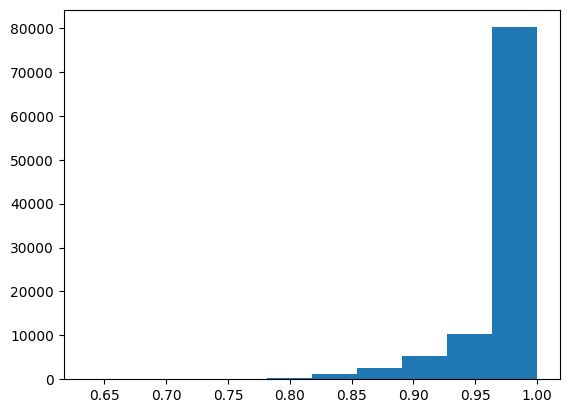

In [ ]:
rates = rates[(rates>-2) & (rates<2)]  # truncate distribution so it plots well
plt.hist(rates)
plt.show()

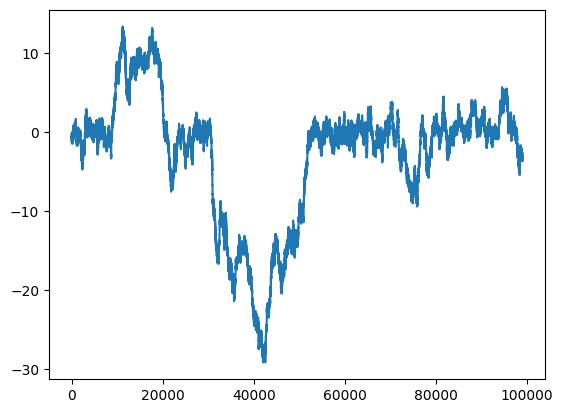

In [ ]:
xs = np.arange(100000-1000)
plt.plot(xs, samples)
plt.show()

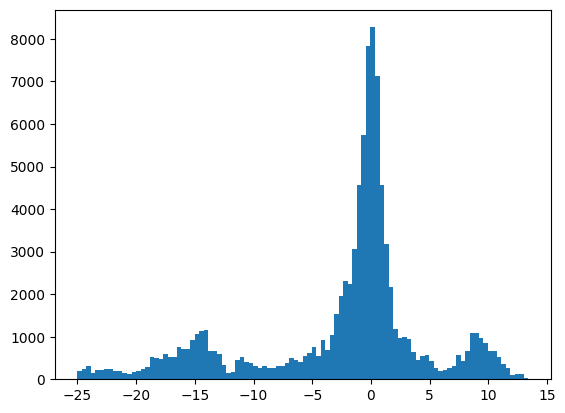

In [ ]:
samples = samples[(samples>-25) & (samples<25)] # truncate distribution so it plots well
plt.hist(samples, bins=100)
plt.show()

### b) High variance: in that case $r$ is small so you almost dont explore the state space, keeping the chain in the current position

In [ ]:
n = 100000
b_var = 10

In [ ]:
samples, rates, unif_samples = mcmc(cau_dens,  n_steps = n, b = b_var)

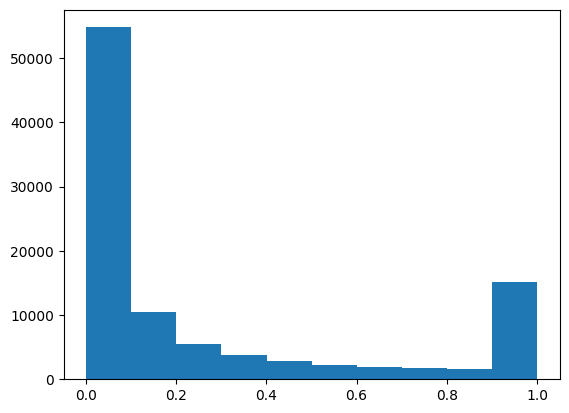

In [ ]:
rates = rates[(rates>-2) & (rates<2)]  # truncate distribution so it plots well
plt.hist(rates)
plt.show()

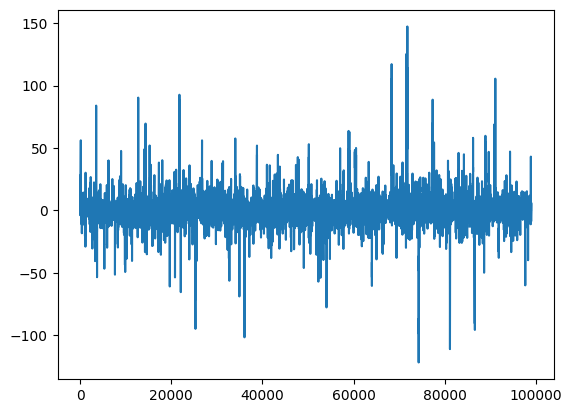

In [ ]:
xs = np.arange(n-1000)
plt.plot(xs, samples)
plt.show()

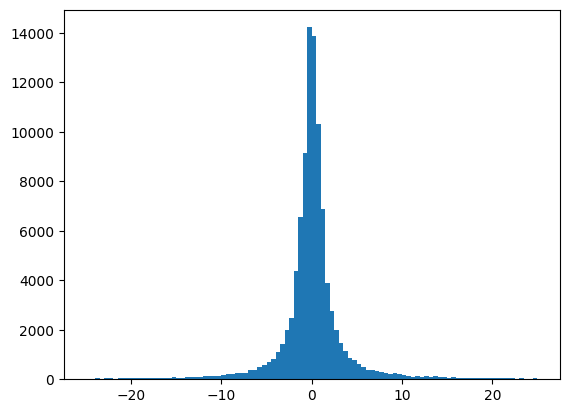

In [ ]:
samples = samples[(samples>-25) & (samples<25)]  # truncate distribution so it plots well
plt.hist(samples, bins=100)
plt.show()

### Intermediate variance

In [ ]:
samples, rates, unif_samples = mcmc(cau_dens, n_steps=1000000)

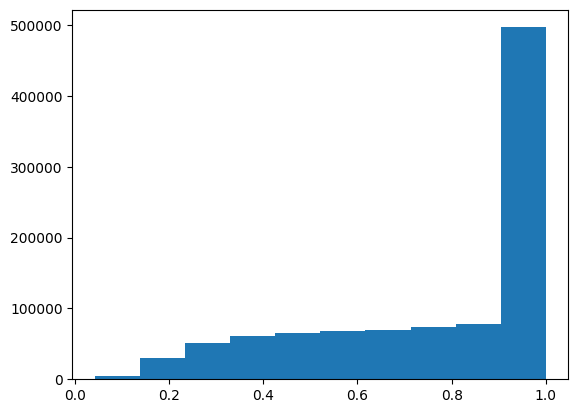

In [ ]:
rates = rates[(rates>-2) & (rates<2)]  # truncate distribution so it plots well
plt.hist(rates)
plt.show()

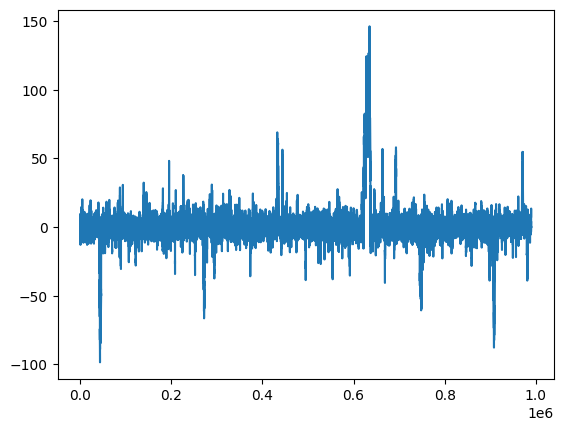

In [ ]:
xs = np.arange(1000000-10000)
plt.plot(xs, samples)
plt.show()

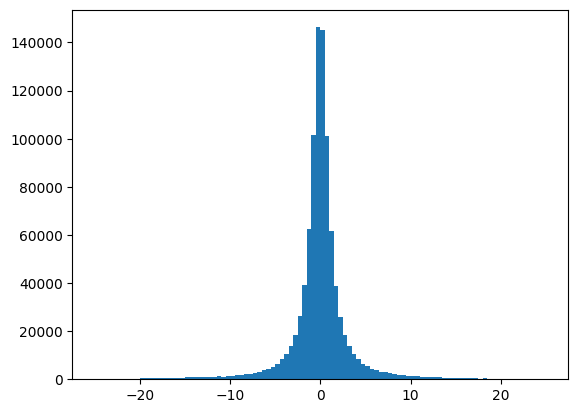

In [ ]:
samples = samples[(samples>-25) & (samples<25)]  # truncate distribution so it plots well
plt.hist(samples, bins=100)
plt.show()

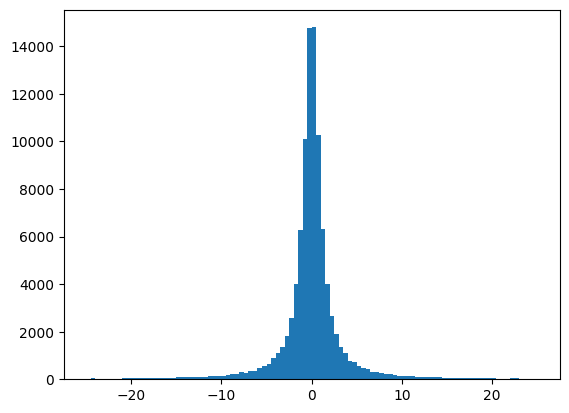

In [ ]:
samples = np.random.standard_cauchy(n)
samples = samples[(samples>-25) & (samples<25)]  # truncate distribution so it plots well
plt.hist(samples, bins=100)
plt.show()

# Compute integrals over $\mathbb{R}$

Suppose you want to compute the integral $\int \sqrt{|x|}\frac{1}{\pi}\frac{1}{1+x^2}dx$. Now that we know how to sample from $f$ using MCMC, we can approximate that integral by the theorem of ergodic Markov chains:
$$\frac{1}{N}\sum_{i=1}^Nh(X_i)\to\mathbb{E}h(X)$$
where $h(x) = \sqrt{|x|}$ and $X_i$ is the sample obtained from our Markov chain and the expectation is computed w.r.t the density $f$.

According to Wolfram Alpha and Wikipedia, this integral is $\sec(\pi/4) = \sqrt{2}≈1.41$.

In [ ]:
samples, rates, unif_samples, acceptance_rate = mcmc(cau_dens, n_steps=1000000, b = 8)

In [ ]:
acceptance_rate

0.313674

In [ ]:
def f(x):
  mod = np.absolute(x)
  return np.sqrt(mod)

In [ ]:
appro_int = np.mean(f(samples))
print(appro_int)

1.3634168927354087


Ok that is kinda of good approximation... Remember to tune the parameters of your algorithm: n_steps, b and the burnin phase. The acceptance rate should be around 0.3 (as Wikipedia says).

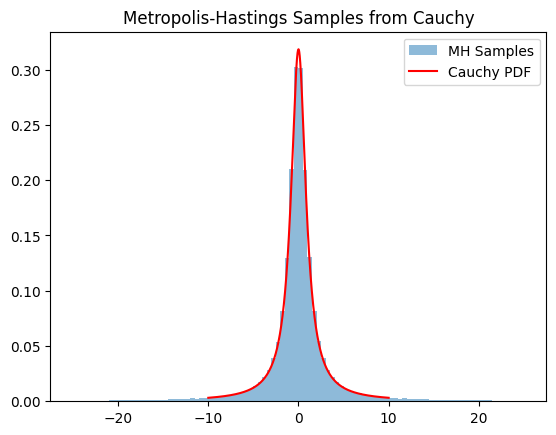

In [ ]:
samples = samples[(samples>-25) & (samples<25)]# truncate distribution so it plots well
n = samples.shape[0]
plt.hist(samples, bins=100, density=True, alpha=0.5, label='MH Samples')
x_vals = np.linspace(-10, 10, n)
plt.plot(x_vals, 1 / (np.pi * (1 + x_vals**2)), 'r-', label='Cauchy PDF')
plt.legend()
plt.title('Metropolis-Hastings Samples from Cauchy')
plt.show()


At least the histogram looks good so the job o sampling is apparentely well done.